## Import Libraries : 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy import stats   


import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data Collection:

#### Location data for all world capitals will be retrived from techslides.com

In [2]:
# Read Table from wikipedia site: (All World wide capitals)
capitals_df= pd.read_html('http://techslides.com/list-of-countries-and-capitals', header=0)  # using direct pandas read_html function 
capitals_df = capitals_df[0]
capitals_df.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
1,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
2,Albania,Tirana,41.316667,19.816667,AL,Europe
3,Algeria,Algiers,36.750000,3.050000,DZ,Africa
4,American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia


In [3]:
capitals_df.info()    # explore dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
Country Name         245 non-null object
Capital Name         241 non-null object
Capital Latitude     245 non-null float64
Capital Longitude    245 non-null float64
Country Code         242 non-null object
Continent Name       245 non-null object
dtypes: float64(2), object(4)
memory usage: 11.6+ KB


#### Population and GDP data will be retrieved from doheth.co.uk website

In [4]:
# Read Table from doheth.co.uk site: (All World wide capitals)
gen_df= pd.read_html('http://doheth.co.uk/info/countries-of-the-world.php', header=0)  # using direct pandas read_html function 
gen_df = gen_df[0]
gen_df.head()

,Name (English),Location (Continent),Capital city (official),Currency (poss. multiple),Population (inhabitants),Area (km²),Pop. density (inhabitants/km²),GDP (nominal) (millions of USD),Life exp. (years),"Birth rate (births/1,000)","Death rate (deaths/1,000)"
0,Abkhazia,Asia (Central West),Sukhumi,Georgian lari;Russian ruble,216000,8600,25,-,-,-,-
1,Afghanistan,Asia (Central),Kabul,Afghan afghani,29863010,652090,46,7168,42.90,46.60,20.75
2,Albania,Europe (South East),Tirana,Albanian lek,3129678,28748,109,8379,77.24,15.11,5.12
3,Algeria,Africa (North Central),Algiers,Algerian dinar,32853800,2381741,13,102257,73.00,17.14,4.60
4,Andorra,Europe (South West),Andorra la Vella,Euro,67151,468,143,960,83.51,8.71,6.07


In [5]:
gen_df.info()        # explore dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
Name  (English)                     199 non-null object
Location  (Continent)               199 non-null object
Capital city  (official)            199 non-null object
Currency  (poss. multiple)          199 non-null object
Population  (inhabitants)           199 non-null int64
Area  (km²)                         199 non-null object
Pop. density  (inhabitants/km²)     199 non-null int64
GDP (nominal)  (millions of USD)    199 non-null object
Life exp.  (years)                  199 non-null object
Birth rate  (births/1,000)          199 non-null object
Death rate  (deaths/1,000)          199 non-null object
dtypes: int64(2), object(9)
memory usage: 17.2+ KB


#### Limit dataframes to African capitals

In [6]:
# Filter Data Frame to African Capitals only:
africa1_df=capitals_df[capitals_df['Continent Name'] == 'Africa'].reset_index(drop=True)  # filter first dataframe 
africa1_df.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Algeria,Algiers,36.750000,3.050000,DZ,Africa
1,Angola,Luanda,-8.833333,13.216667,AO,Africa
2,Benin,Porto-Novo,6.483333,2.616667,BJ,Africa
3,Botswana,Gaborone,-24.633333,25.900000,BW,Africa
4,British Indian Ocean Territory,Diego Garcia,-7.300000,72.400000,IO,Africa


In [7]:
africa1_df.info()          # Explore dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
Country Name         58 non-null object
Capital Name         58 non-null object
Capital Latitude     58 non-null float64
Capital Longitude    58 non-null float64
Country Code         56 non-null object
Continent Name       58 non-null object
dtypes: float64(2), object(4)
memory usage: 2.8+ KB


In [8]:
# Repeat same procedurs for data frame of population data:
africa2_df=gen_df[gen_df['Location  (Continent)'].str.contains('Africa')]       # filter second dataframe
africa2_df.head()

,Name (English),Location (Continent),Capital city (official),Currency (poss. multiple),Population (inhabitants),Area (km²),Pop. density (inhabitants/km²),GDP (nominal) (millions of USD),Life exp. (years),"Birth rate (births/1,000)","Death rate (deaths/1,000)"
3,Algeria,Africa (North Central),Algiers,Algerian dinar,32853800,2381741,13,102257,73.00,17.14,4.60
5,Angola,Africa (South West),Luanda,Angolan kwanza,15941390,1246700,12,28038,38.43,45.11,24.50
19,Benin,Africa (North West),Cotonou,West African CFA franc,8438853,112622,75,4287,52.66,38.85,12.49
23,Botswana,Africa (South Central),Gaborone,Botswana pula,1764926,581730,3,9350,33.87,23.08,29.36
27,Burkina Faso,Africa (North West),Ouagadougou,West African CFA franc,13227840,274000,48,5171,48.45,45.62,15.92


In [9]:
africa2_df.info()        # Explore dataframe information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3 to 198
Data columns (total 11 columns):
Name  (English)                     55 non-null object
Location  (Continent)               55 non-null object
Capital city  (official)            55 non-null object
Currency  (poss. multiple)          55 non-null object
Population  (inhabitants)           55 non-null int64
Area  (km²)                         55 non-null object
Pop. density  (inhabitants/km²)     55 non-null int64
GDP (nominal)  (millions of USD)    55 non-null object
Life exp.  (years)                  55 non-null object
Birth rate  (births/1,000)          55 non-null object
Death rate  (deaths/1,000)          55 non-null object
dtypes: int64(2), object(9)
memory usage: 5.2+ KB


#### Rename columns and set same index column

In [10]:
# Rmoving nan values, and renaming columns to be easily called:
africa1_df=africa1_df[africa1_df['Capital Name'] != 'NAN']
africa2_df=africa2_df[africa2_df['Capital city  (official)'] != 'NAN']


africa1_df.rename(columns={'Country Name':'Country','Capital Name':'Capital','Capital Latitude':'Lat','Capital Longitude':'Long'}, inplace=True)
africa2_df.rename(columns={'Capital city  (official)':'Capital','Population  (inhabitants)':'Pop','Area  (km²)':'Area','Pop. density  (inhabitants/km²)':'Pop.density','GDP (nominal)  (millions of USD)':'GDP','Life exp.  (years)':'Life','Birth rate  (births/1,000)':'B.rate','Death rate  (deaths/1,000)':'D.rate'}, inplace=True)

africa1_df=africa1_df.set_index('Capital')
africa2_df=africa2_df.set_index('Capital')

africa1_df.head()

,Country,Lat,Long,Country Code,Continent Name
Capital,,,,,
Algiers,Algeria,36.750000,3.050000,DZ,Africa
Luanda,Angola,-8.833333,13.216667,AO,Africa
Porto-Novo,Benin,6.483333,2.616667,BJ,Africa
Gaborone,Botswana,-24.633333,25.900000,BW,Africa
Diego Garcia,British Indian Ocean Territory,-7.300000,72.400000,IO,Africa


In [11]:
africa2_df.head()

,Name (English),Location (Continent),Currency (poss. multiple),Pop,Area,Pop.density,GDP,Life,B.rate,D.rate
Capital,,,,,,,,,,
Algiers,Algeria,Africa (North Central),Algerian dinar,32853800,2381741,13,102257,73.00,17.14,4.60
Luanda,Angola,Africa (South West),Angolan kwanza,15941390,1246700,12,28038,38.43,45.11,24.50
Cotonou,Benin,Africa (North West),West African CFA franc,8438853,112622,75,4287,52.66,38.85,12.49
Gaborone,Botswana,Africa (South Central),Botswana pula,1764926,581730,3,9350,33.87,23.08,29.36
Ouagadougou,Burkina Faso,Africa (North West),West African CFA franc,13227840,274000,48,5171,48.45,45.62,15.92


#### let's check capitals which found in only one dataframe (as our data sources are different) 

In [12]:
l1=africa1_df.index.to_list()            #list of caapitals in first dataframe
l2=africa2_df.index.to_list()            #list of capitals in second dataframe
diff = [i for i in l1 if i not in l2]    #capitals not included in second dataframe
diff

['Porto-Novo',
 'Diego Garcia',
 'Yaounde',
 'N’Djamena',
 'Yamoussoukro',
 'Djibouti',
 'Jamestown',
 'Sao Tome',
 'Pretoria',
 'Juba',
 'Mbabane',
 'Lome',
 'El-AaiÃºn']

#### let's finally combine data in one dataframe prior to data preprocessing

In [13]:
# Merge two dataframes:
africa_df = pd.merge(africa2_df,africa1_df, on='Capital', how='inner')     # ineer join two data frames
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, Algiers to Harare
Data columns (total 15 columns):
Name  (English)               45 non-null object
Location  (Continent)         45 non-null object
Currency  (poss. multiple)    45 non-null object
Pop                           45 non-null int64
Area                          45 non-null object
Pop.density                   45 non-null int64
GDP                           45 non-null object
Life                          45 non-null object
B.rate                        45 non-null object
D.rate                        45 non-null object
Country                       45 non-null object
Lat                           45 non-null float64
Long                          45 non-null float64
Country Code                  43 non-null object
Continent Name                45 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 5.6+ KB


## Preprocessing Data (Data wrankling):

### Missing values:

In [14]:
# Check for missing values : 
africa_df.isnull().sum()

Name  (English)               0
Location  (Continent)         0
Currency  (poss. multiple)    0
Pop                           0
Area                          0
Pop.density                   0
GDP                           0
Life                          0
B.rate                        0
D.rate                        0
Country                       0
Lat                           0
Long                          0
Country Code                  2
Continent Name                0
dtype: int64

####  as only two records missing only country code data, we will keep records

In [15]:
#let's discover which records missing country code: 
null_columns=africa_df.columns[africa_df.isnull().any()]
print(africa_df[africa_df.isnull().any(axis=1)][null_columns].head())

         Country Code
Capital              
Windhoek          NaN
Hargeisa          NaN


In [16]:
# more check of record reveals that one of them missing other columns, so we will drop this record:
africa_df.loc['Hargeisa']

Name  (English)                         Somaliland
Location  (Continent)         Africa  (North East)
Currency  (poss. multiple)     Somaliland shilling
Pop                                        3500000
Area                                        137600
Pop.density                                     25
GDP                                              -
Life                                             -
B.rate                                           -
D.rate                                           -
Country                                 Somaliland
Lat                                           9.55
Long                                         44.05
Country Code                                   NaN
Continent Name                              Africa
Name: Hargeisa, dtype: object

#### unfortunately, one of the two records missing a lot of values, let's drop it

In [17]:
africa_df.drop('Hargeisa',axis=0, inplace=True)  # drop row by index label

In [18]:
africa_df.shape

(44, 15)

### Data Types :

In [19]:
# let's filter dataframe to only columns of interest (drop not-relevant columns):
africa_df=africa_df.reset_index()
africa_df=africa_df[['Capital','Country','Lat','Long','Area','Pop','Pop.density','GDP','Life','B.rate','D.rate']]
africa_df.head()

,Capital,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate
0,Algiers,Algeria,36.750000,3.050000,2381741,32853800,13,102257,73.00,17.14,4.60
1,Luanda,Angola,-8.833333,13.216667,1246700,15941390,12,28038,38.43,45.11,24.50
2,Gaborone,Botswana,-24.633333,25.900000,581730,1764926,3,9350,33.87,23.08,29.36
3,Ouagadougou,Burkina Faso,12.366667,-1.516667,274000,13227840,48,5171,48.45,45.62,15.92
4,Bujumbura,Burundi,-3.366667,29.350000,27834,7547515,271,800,50.29,42.22,13.79


In [20]:
# check data type of each column:
africa_df.dtypes

Capital         object
Country         object
Lat            float64
Long           float64
Area            object
Pop              int64
Pop.density      int64
GDP             object
Life            object
B.rate          object
D.rate          object
dtype: object

#### Will convert some columns to numerical format to apply mathematical functions:

In [21]:
# Modifying data types:
cols_to_change = ['Area','GDP','Life','B.rate','D.rate']       # list of columns that will be converted to numerical format
for col in cols_to_change:
    africa_df[col] = africa_df [col].astype('float64')
africa_df.dtypes                                              # check new datatypes

Capital         object
Country         object
Lat            float64
Long           float64
Area           float64
Pop              int64
Pop.density      int64
GDP            float64
Life           float64
B.rate         float64
D.rate         float64
dtype: object

### Binning numerical columns:

#### Binning will convert columns with wide range of values into distinct groups

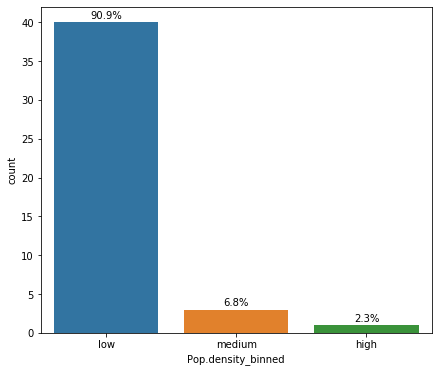

In [22]:
# let's convert population density column into bins:
bins=np.linspace(min(africa_df['Pop.density']),max(africa_df['Pop.density']),4)
labels = ['low', 'medium', 'high']
africa_df['Pop.density_binned'] = pd.cut(africa_df['Pop.density'], bins=bins, labels= labels, include_lowest=True)
fig, ax = plt.subplots(figsize=(7,6))
sns.countplot('Pop.density_binned', data=africa_df, ax=ax)
total=float(len(africa_df['Pop.density_binned']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+.5 , '{:1.1f}%'.format(height*100/total), ha="center")

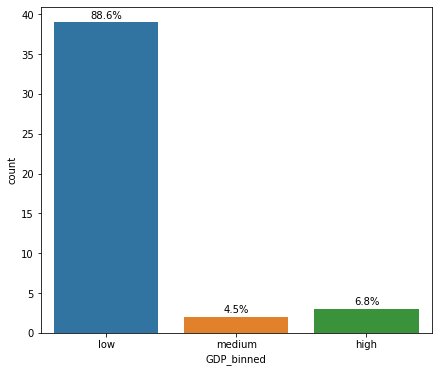

In [23]:
# let's convert GDP column into bins:
bins=np.linspace(min(africa_df['GDP']),max(africa_df['GDP']),4)
labels = ['low', 'medium', 'high']
africa_df['GDP_binned'] = pd.cut(africa_df['GDP'], bins=bins, labels= labels, include_lowest=True)
fig, ax = plt.subplots(figsize=(7,6))
sns.countplot('GDP_binned', data=africa_df, ax=ax)
total=float(len(africa_df['GDP_binned']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+.5 , '{:1.1f}%'.format(height*100/total), ha="center")

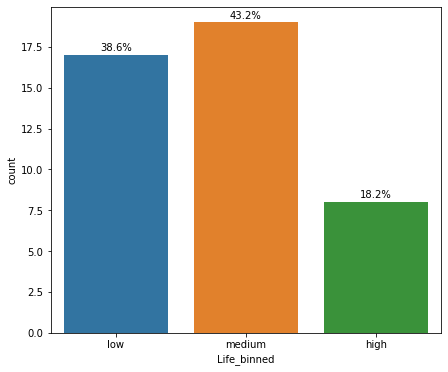

In [24]:
# let's convert life exp. column into bins:
bins=np.linspace(min(africa_df['Life']),max(africa_df['Life']),4)
labels = ['low', 'medium', 'high']
africa_df['Life_binned'] = pd.cut(africa_df['Life'], bins=bins, labels= labels, include_lowest=True)
fig, ax = plt.subplots(figsize=(7,6))
sns.countplot('Life_binned', data=africa_df, ax=ax)
total=float(len(africa_df['Life_binned']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+.25 , '{:1.1f}%'.format(height*100/total), ha="center")

## Explatoray Data Analysis (EDA):

### Descriptive statistics:

#### let's use describe method to explore main statistics of our data :

In [25]:
africa_df.describe(percentiles=[.5]).transpose().round()

,count,mean,std,min,50%,max
Lat,44.0,3.0,17.0,-29.0,4.0,37.0
Long,44.0,17.0,22.0,-24.0,16.0,57.0
Area,44.0,602930.0,662606.0,455.0,366378.0,2505813.0
Pop,44.0,18104138.0,25388651.0,80654.0,9752284.0,131529700.0
Pop.density,44.0,80.0,116.0,2.0,40.0,610.0
GDP,44.0,14428.0,25069.0,301.0,5134.0,102257.0
Life,44.0,52.0,12.0,34.0,50.0,76.0
B.rate,44.0,35.0,10.0,15.0,37.0,51.0
D.rate,44.0,15.0,6.0,3.0,15.0,29.0


### Data Distribution & Outlier values :

In [26]:
def plot_dist(n_rows,n_cols,df=pd.DataFrame(),fig_size=(10,10), bins=10):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.distplot(df_vis[mycols[col_index]], ax= ax[row][col], bins=bins)
                ax[row][col].set_title('Distribution plot for {} distribution'.format(mycols[col_index]))
                col_index +=1
    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.distplot(df[mycols[col_index]], ax= ax[col], bins=bins)
                ax[col].set_title('Distribution plot for {} '.format(mycols[col_index]))
                col_index +=1
                
def plot_box(n_rows,n_cols,df=pd.DataFrame(),fig_size=(30,30)):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.boxplot(df[mycols[col_index]], ax= ax[row][col])
                ax[row][col].set_title('Box plot for {}'.format(mycols[col_index]))
                col_index +=1
    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.boxplot(df[mycols[col_index]], ax= ax[col])
                ax[col].set_title('Box plot for {} '.format(mycols[col_index]))
                col_index +=1


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

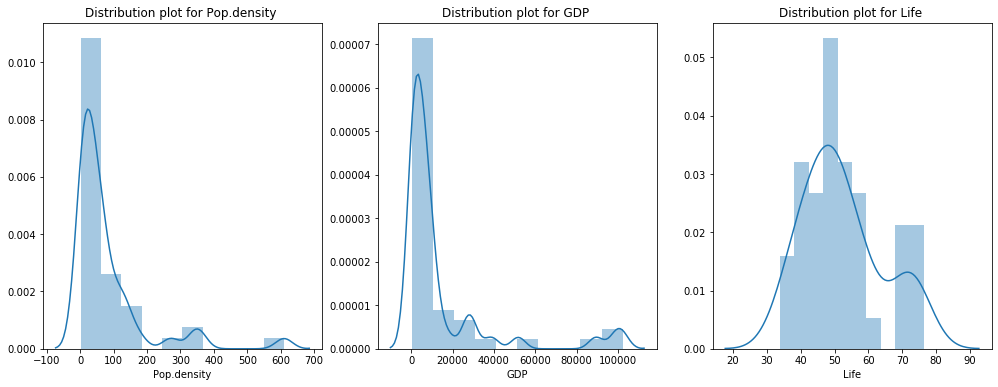

In [27]:
plot_dist(1,3,df=africa_df[['Pop.density','GDP','Life']], fig_size=(17,6))
plt.tight_layout

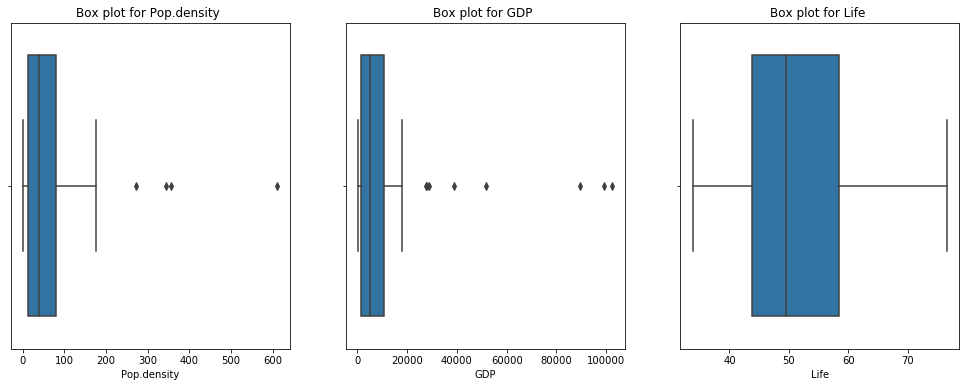

In [28]:
plot_box(1,3,df=africa_df[['Pop.density','GDP','Life']], fig_size=(17,6))

#### from above figures let us check capitals with outrange values for three columns: 

In [29]:
# let's check capitals which populationn density more than 200 inhabitants/km²:
africa_df[africa_df['Pop.density'] > 200]

,Capital,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate,Pop.density_binned,GDP_binned,Life_binned
4,Bujumbura,Burundi,-3.366667,29.350000,27834.0,7547515,271,800.0,50.29,42.22,13.79,medium,low,medium
7,Moroni,Comoros,-11.700000,43.233333,2235.0,797902,357,382.0,61.96,36.93,8.40,medium,low,medium
27,Port Louis,Mauritius,-20.150000,57.483333,2040.0,1244663,610,6447.0,72.38,15.43,6.83,high,low,high
33,Kigali,Rwanda,-1.950000,30.050000,26338.0,9037690,343,2131.0,46.96,40.37,16.32,medium,low,low


In [30]:
# Capital with maximum Population density can be found as following:
africa_df[africa_df['Pop.density'] == max(africa_df['Pop.density']) ]

,Capital,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate,Pop.density_binned,GDP_binned,Life_binned
27,Port Louis,Mauritius,-20.15,57.483333,2040.0,1244663,610,6447.0,72.38,15.43,6.83,high,low,high


In [31]:
# let's check capitals with GDP more than 20,000 millions of USD:
africa_df[africa_df['GDP'] > 20000]

,Capital,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate,Pop.density_binned,GDP_binned,Life_binned
0,Algiers,Algeria,36.750000,3.050000,2381741.0,32853800,13,102257.0,73.00,17.14,4.60,low,high,high
1,Luanda,Angola,-8.833333,13.216667,1246700.0,15941390,12,28038.0,38.43,45.11,24.50,low,low,low
10,Cairo,Egypt,30.050000,31.250000,1001449.0,74032880,74,89336.0,71.00,22.94,5.26,low,high,high
22,Tripoli,Libya,32.883333,13.166667,1759540.0,5853452,3,38756.0,76.50,26.49,3.48,low,medium,high
28,Rabat,Morocco,34.016667,-6.816667,446550.0,31478460,70,51745.0,70.66,21.98,5.64,low,medium,high
32,Abuja,Nigeria,9.083333,7.533333,923768.0,131529700,142,98951.0,46.74,40.43,17.18,low,high,low
38,Khartoum,Sudan,15.600000,32.533333,2505813.0,36232950,14,27699.0,58.54,34.53,9.16,low,low,medium
40,Tunis,Tunisia,36.800000,10.183333,163610.0,10102470,62,28683.0,74.89,15.52,5.09,low,low,high


In [32]:
# Capital with maximum GDP can be found as following:
africa_df = africa_df.set_index('Capital')
africa_df[africa_df['GDP'] == max(africa_df['GDP']) ]

,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate,Pop.density_binned,GDP_binned,Life_binned
Capital,,,,,,,,,,,,,
Algiers,Algeria,36.75,3.05,2381741.0,32853800,13,102257.0,73.0,17.14,4.6,low,high,high


In [33]:
# let's check capitals with Life.exp more than 75 years:
africa_df[africa_df['Life'] > 75]

,Country,Lat,Long,Area,Pop,Pop.density,GDP,Life,B.rate,D.rate,Pop.density_binned,GDP_binned,Life_binned
Capital,,,,,,,,,,,,,
Tripoli,Libya,32.883333,13.166667,1759540.0,5853452,3,38756.0,76.5,26.49,3.48,low,medium,high


## Correlation between variables:

#### will check if there is direct relation between different main columns:

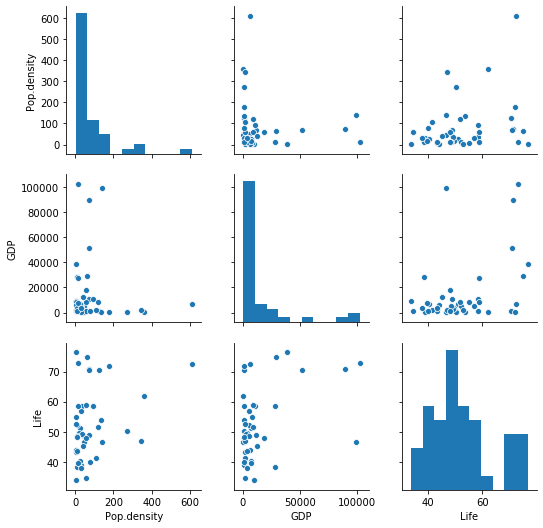

In [34]:
sns.pairplot(africa_df[['Pop.density','GDP','Life']])

#### no clear strong relation can be observed, but let check two parameters that slightly related:

(0, 643.0912864625957)

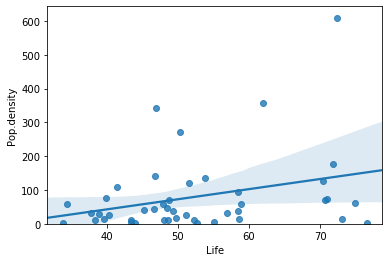

In [35]:
# let's use regression plot from seaborn library:
sns.regplot(x=africa_df['Life'],y=africa_df['Pop.density'])
plt.ylim(0,)

In [36]:
# let's check relation strenght and confidence with scipy.stats:
coef,p_value= stats.pearsonr(africa_df['Life'],africa_df['Pop.density'])
print(coef,p_value)

0.3016050604228728 0.046631952500489814


## Data Preparation:

#### After we converted continous values to bins, now we will convert those categorial values into numerical (one-hot coding)

In [37]:
# will start by population density:
africa_df = africa_df.reset_index()
dummy_var = pd.get_dummies(africa_df['Pop.density_binned'], prefix='P_density')
# africa_df_encoded= africa_df.drop('Pop.density_binned', axis=1)
africa_df_encoded = pd.DataFrame()
africa_df_encoded ['Capital'] = africa_df ['Capital']
africa_df_encoded=pd.concat([africa_df_encoded,dummy_var], axis=1)
africa_df_encoded.head()

,Capital,P_density_low,P_density_medium,P_density_high
0,Algiers,1,0,0
1,Luanda,1,0,0
2,Gaborone,1,0,0
3,Ouagadougou,1,0,0
4,Bujumbura,0,1,0


In [38]:
# then GDP :
dummy_var = pd.get_dummies(africa_df['GDP_binned'], prefix='GDP')
africa_df_encoded=pd.concat([africa_df_encoded,dummy_var], axis=1)
africa_df_encoded.head()

,Capital,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high
0,Algiers,1,0,0,0,0,1
1,Luanda,1,0,0,1,0,0
2,Gaborone,1,0,0,1,0,0
3,Ouagadougou,1,0,0,1,0,0
4,Bujumbura,0,1,0,1,0,0


In [39]:
# then Life.exp :
dummy_var = pd.get_dummies(africa_df['Life_binned'], prefix='Life')
africa_df_encoded=pd.concat([africa_df_encoded,dummy_var], axis=1)
africa_df_encoded.head()

,Capital,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high
0,Algiers,1,0,0,0,0,1,0,0,1
1,Luanda,1,0,0,1,0,0,1,0,0
2,Gaborone,1,0,0,1,0,0,1,0,0
3,Ouagadougou,1,0,0,1,0,0,0,1,0
4,Bujumbura,0,1,0,1,0,0,0,1,0


## Getting Foursquare Data:

#### Now it is time to get venues of each capital using FourSquare platform:

In [40]:
## Create function to explore venues:

CLIENT_ID = 'LZU2EMARAXADU3FJJSCDAPNG0ULAJB3V2VEX5CDZ1SQ22SDH'       #FourSquare ID 

CLIENT_SECRET = 'QBC22I2UI5BJEVYPKHHBHH4YQ4344CCCLCKSW5PJ4N33DSNU'   #FourSquare Pass

VERSION = '20180605'                                                 #FourSquare Version (update)

LIMIT = 500

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])


    africa_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    africa_venues.columns = ['Capital', 'Capital Latitude', 'Capital Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    
    print('Retrived Data from FourSquare')
    
    return(africa_venues)

In [41]:
# Call Function and apply it on our dataframe:
africa_venues = getNearbyVenues(names=africa_df['Capital'], latitudes=africa_df['Lat'], longitudes=africa_df['Long'])

Retrived Data from FourSquare


In [42]:
africa_venues.head()      #explore dataframe

,Capital,Capital Latitude,Capital Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Algiers,36.75,3.05,Shakespeare,36.750487,3.048385,Café
1,Algiers,36.75,3.05,Hotel El-Djazair (ex Saint George),36.754473,3.046567,Hotel
2,Algiers,36.75,3.05,Pepper Burger,36.746180,3.040762,Burger Joint
3,Algiers,36.75,3.05,Golf,36.748277,3.050937,Plaza
4,Algiers,36.75,3.05,Dar Diaf Hotel,36.751708,3.051842,Hotel


In [43]:
# check number of unique categories:
len(africa_venues['Venue Category'].unique())

133

In [44]:
# check how many each category appears: 
africa_venues['Venue Category'].value_counts()

Hotel                          47
Café                           43
Coffee Shop                    23
Bar                            20
Restaurant                     20
African Restaurant             18
Fast Food Restaurant           14
Shopping Mall                  13
Plaza                          12
Theater                        11
Pizza Place                     9
Market                          8
Hotel Bar                       7
Italian Restaurant              7
Bakery                          7
Park                            6
French Restaurant               6
Movie Theater                   6
Fried Chicken Joint             6
Clothing Store                  6
Diner                           5
Ice Cream Shop                  5
Middle Eastern Restaurant       5
Art Gallery                     5
Bus Station                     5
Steakhouse                      5
Historic Site                   5
Grocery Store                   5
Convenience Store               5
Lounge        

## Modeling (K-Mean Clustering):

#### Now we will cluster capitals based on venues, Pop.density, GDP, and life exp.

#### lets also apply one-hot coding for venues , as we did for (Pop.density, GDP, Life)

In [45]:
# let's group by capitals, to keeep one record for each capital:
africa_venues_grouped = africa_venues.groupby('Capital').mean().reset_index()
africa_venues_grouped.head()

,Capital,Capital Latitude,Capital Longitude,Venue Latitude,Venue Longitude
0,Accra,5.550000,-0.216667,5.549687,-0.211624
1,Addis Ababa,9.033333,38.700000,9.033300,38.699902
2,Algiers,36.750000,3.050000,36.750565,3.047017
3,Antananarivo,-18.916667,47.516667,-18.913168,47.518947
4,Asmara,15.333333,38.933333,15.334783,38.932982


In [46]:
africa_venues_grouped.shape  #explore grouped data frame

(39, 5)

In [47]:
# applying one-hot coding for venues :
dummy_var = pd.get_dummies(africa_venues['Venue Category'], prefix='')
africa_venues_encoded = pd.DataFrame()
africa_venues_encoded ['Capital'] = africa_venues ['Capital']
africa_venues_encoded=pd.concat([africa_venues_encoded,dummy_var], axis=1)
africa_venues_encoded_grouped = africa_venues_encoded.groupby('Capital').mean().reset_index()
africa_venues_encoded_grouped.head()

,Capital,_African Restaurant,_Airport Lounge,_American Restaurant,_Arcade,_Art Gallery,_Art Museum,_Arts & Crafts Store,_Arts & Entertainment,_Asian Restaurant,_Athletics & Sports,_Auto Dealership,_BBQ Joint,_Bakery,_Bar,_Basketball Court,_Beach,_Beer Garden,_Boat or Ferry,_Bookstore,_Boutique,_Breakfast Spot,_Bridge,_Buffet,_Burger Joint,_Bus Station,_Café,_Casino,_Chinese Restaurant,_Clothing Store,_Cocktail Bar,_Coffee Shop,_Comfort Food Restaurant,_Convenience Store,_Cosmetics Shop,_Cultural Center,_Currency Exchange,_Department Store,_Dessert Shop,_Diner,_Donut Shop,_Eastern European Restaurant,_Egyptian Restaurant,_Electronics Store,_Ethiopian Restaurant,_Fabric Shop,_Falafel Restaurant,_Farmers Market,_Fast Food Restaurant,_Flea Market,_Food,_Food & Drink Shop,_French Restaurant,_Fried Chicken Joint,_Furniture / Home Store,_Garden,_Gastropub,_German Restaurant,_Grocery Store,_Gym,_Harbor / Marina,_Historic Site,_History Museum,_Hookah Bar,_Hostel,_Hotel,_Hotel Bar,_Hotel Pool,_Ice Cream Shop,_Indian Restaurant,_Indie Movie Theater,_Intersection,_Italian Restaurant,_Juice Bar,_Karaoke Bar,_Kebab Restaurant,_Light Rail Station,_Lounge,_Mac & Cheese Joint,_Market,_Mediterranean Restaurant,_Metro Station,_Middle Eastern Restaurant,_Mobile Phone Shop,_Movie Theater,_Multiplex,_Museum,_Music Venue,_Nature Preserve,_Neighborhood,_Nightclub,_Office,_Optical Shop,_Other Nightlife,_Outlet Store,_Park,_Pastry Shop,_Performing Arts Venue,_Pharmacy,_Pie Shop,_Pizza Place,_Plaza,_Pool,_Pub,_Restaurant,_River,_Road,_Roof Deck,_Sandwich Place,_Seafood Restaurant,_Shoe Store,_Shopping Mall,_Smoke Shop,_Snack Place,_Soccer Field,_Soup Place,_Sporting Goods Shop,_Sports Club,_Stadium,_Steakhouse,_Supermarket,_Swiss Restaurant,_Tailor Shop,_Tea Room,_Tennis Stadium,_Thai Restaurant,_Theater,_Train Station,_Tunnel,_Turkish Restaurant,_Used Bookstore,_Video Store,_Wine Bar,_Women's Store
0,Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Addis Ababa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algiers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Antananarivo,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [48]:
africa_venues_encoded_grouped.shape   # shape of grouped encoded venues

(39, 134)

In [49]:
africa_df_encoded.shape             # shape of encoded GDP, Pop.deensity, and Life exp.

(44, 10)

#### will create data frame sorting venues

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
africa_venues_sorted = pd.DataFrame(columns=columns)
africa_venues_sorted['Capital'] = africa_venues_encoded_grouped['Capital']

for ind in np.arange(africa_venues_encoded_grouped.shape[0]):
    africa_venues_sorted.iloc[ind, 1:] = return_most_common_venues(africa_venues_encoded_grouped.iloc[ind, :], num_top_venues)

africa_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Accra,_Coffee Shop,_Shopping Mall,_Women's Store,_Egyptian Restaurant,_Farmers Market
1,Addis Ababa,_Restaurant,_Hotel Bar,_Eastern European Restaurant,_Farmers Market,_Falafel Restaurant
2,Algiers,_Hotel,_Plaza,_Market,_Pizza Place,_Café
3,Antananarivo,_French Restaurant,_African Restaurant,_Arts & Entertainment,_Other Nightlife,_Restaurant
4,Asmara,_Hotel,_Pizza Place,_Airport Lounge,_Cosmetics Shop,_Currency Exchange


In [52]:
africa_venues_sorted.shape

(39, 6)

#### let's combine the two encoded data frames:

In [53]:
africa_venues_encoded_grouped = africa_venues_encoded_grouped.set_index('Capital')
africa_df_encoded = africa_df_encoded.set_index('Capital')
africa_gen_encoded = pd.merge(africa_venues_encoded_grouped,africa_df_encoded, on='Capital', how='inner')     # ineer join two data frames
africa_gen_encoded.head()

,_African Restaurant,_Airport Lounge,_American Restaurant,_Arcade,_Art Gallery,_Art Museum,_Arts & Crafts Store,_Arts & Entertainment,_Asian Restaurant,_Athletics & Sports,_Auto Dealership,_BBQ Joint,_Bakery,_Bar,_Basketball Court,_Beach,_Beer Garden,_Boat or Ferry,_Bookstore,_Boutique,_Breakfast Spot,_Bridge,_Buffet,_Burger Joint,_Bus Station,_Café,_Casino,_Chinese Restaurant,_Clothing Store,_Cocktail Bar,_Coffee Shop,_Comfort Food Restaurant,_Convenience Store,_Cosmetics Shop,_Cultural Center,_Currency Exchange,_Department Store,_Dessert Shop,_Diner,_Donut Shop,_Eastern European Restaurant,_Egyptian Restaurant,_Electronics Store,_Ethiopian Restaurant,_Fabric Shop,_Falafel Restaurant,_Farmers Market,_Fast Food Restaurant,_Flea Market,_Food,_Food & Drink Shop,_French Restaurant,_Fried Chicken Joint,_Furniture / Home Store,_Garden,_Gastropub,_German Restaurant,_Grocery Store,_Gym,_Harbor / Marina,_Historic Site,_History Museum,_Hookah Bar,_Hostel,_Hotel,_Hotel Bar,_Hotel Pool,_Ice Cream Shop,_Indian Restaurant,_Indie Movie Theater,_Intersection,_Italian Restaurant,_Juice Bar,_Karaoke Bar,_Kebab Restaurant,_Light Rail Station,_Lounge,_Mac & Cheese Joint,_Market,_Mediterranean Restaurant,_Metro Station,_Middle Eastern Restaurant,_Mobile Phone Shop,_Movie Theater,_Multiplex,_Museum,_Music Venue,_Nature Preserve,_Neighborhood,_Nightclub,_Office,_Optical Shop,_Other Nightlife,_Outlet Store,_Park,_Pastry Shop,_Performing Arts Venue,_Pharmacy,_Pie Shop,_Pizza Place,_Plaza,_Pool,_Pub,_Restaurant,_River,_Road,_Roof Deck,_Sandwich Place,_Seafood Restaurant,_Shoe Store,_Shopping Mall,_Smoke Shop,_Snack Place,_Soccer Field,_Soup Place,_Sporting Goods Shop,_Sports Club,_Stadium,_Steakhouse,_Supermarket,_Swiss Restaurant,_Tailor Shop,_Tea Room,_Tennis Stadium,_Thai Restaurant,_Theater,_Train Station,_Tunnel,_Turkish Restaurant,_Used Bookstore,_Video Store,_Wine Bar,_Women's Store,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high
Capital,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0
Addis Ababa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0
Algiers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,1
Antananarivo,0.1,0.0,0.0,0.0,0.0,0.0

In [54]:
africa_gen_encoded.shape

(39, 142)

### create K-cluster model

In [55]:
# set number of clusters
kclusters = 3
africa_gen_encoded = africa_gen_encoded.reset_index()
africa_clustered = africa_gen_encoded.drop('Capital', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(africa_clustered)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1])

In [56]:
# add clustering labels
africa_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

africa_venues_grouped = africa_venues_grouped.set_index('Capital')

# merge dataframes to add latitude/longitude for each neighborhood
africa_merged = africa_venues_grouped.join(africa_venues_sorted.set_index('Capital'), on='Capital')
africa_merged = africa_merged.join(africa_df_encoded, on='Capital')

africa_merged.head() 

,Capital Latitude,Capital Longitude,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high
Capital,,,,,,,,,,,,,,,,,,,
Accra,5.550000,-0.216667,5.549687,-0.211624,0,_Coffee Shop,_Shopping Mall,_Women's Store,_Egyptian Restaurant,_Farmers Market,1,0,0,1,0,0,0,1,0
Addis Ababa,9.033333,38.700000,9.033300,38.699902,0,_Restaurant,_Hotel Bar,_Eastern European Restaurant,_Farmers Market,_Falafel Restaurant,1,0,0,1,0,0,0,1,0
Algiers,36.750000,3.050000,36.750565,3.047017,2,_Hotel,_Plaza,_Market,_Pizza Place,_Café,1,0,0,0,0,1,0,0,1
Antananarivo,-18.916667,47.516667,-18.913168,47.518947,0,_French Restaurant,_African Restaurant,_Arts & Entertainment,_Other Nightlife,_Restaurant,1,0,0,1,0,0,0,1,0
Asmara,15.333333,38.933333,15.334783,38.932982,0,_Hotel,_Pizza Place,_Airport Lounge,_Cosmetics Shop,_Currency Exchange,1,0,0,1,0,0,0,1,0


### Mapping Clusters:

In [57]:
# create map
latitude = 8.7832            # Africa continent latitude 
longitude = 34.5085         # Africa continent longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
cluster_colors = {'0' : 'red', '1' : 'blue', '2':'green'}

# add markers to the map
markers_colors = []
africa_merged = africa_merged.reset_index()
for lat, lon, poi, cluster in zip(africa_merged['Capital Latitude'], africa_merged['Capital Longitude'], africa_merged['Capital'], africa_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        radius=5,
        popup=label,
        icon=folium.Icon(color=cluster_colors[str(cluster)])
        ).add_to(map_clusters)
       
map_clusters

### Clusters:

#### 1- Red_cluster :

In [58]:
africa_merged = africa_merged.reset_index()
cluster_one=africa_merged.loc[africa_merged['Cluster Labels'] == 0, africa_merged.columns[[1] + list(range(5, africa_merged.shape[1]))]]
fixed_columns = [cluster_one.columns[0]] +[cluster_one.columns[2]] + list(cluster_one.columns[8:17])+list(cluster_one.columns[3:8])
cluster_one = cluster_one[fixed_columns].reset_index(drop=True)
cluster_one

,Capital,Cluster Labels,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Accra,0,1,0,0,1,0,0,0,1,0,_Coffee Shop,_Shopping Mall,_Women's Store,_Egyptian Restaurant,_Farmers Market
1,Addis Ababa,0,1,0,0,1,0,0,0,1,0,_Restaurant,_Hotel Bar,_Eastern European Restaurant,_Farmers Market,_Falafel Restaurant
2,Antananarivo,0,1,0,0,1,0,0,0,1,0,_French Restaurant,_African Restaurant,_Arts & Entertainment,_Other Nightlife,_Restaurant
3,Asmara,0,1,0,0,1,0,0,0,1,0,_Hotel,_Pizza Place,_Airport Lounge,_Cosmetics Shop,_Currency Exchange
4,Bamako,0,1,0,0,1,0,0,0,1,0,_Hotel,_Turkish Restaurant,_Multiplex,_Art Gallery,_Bar
5,Banjul,0,1,0,0,1,0,0,0,1,0,_Harbor / Marina,_Nature Preserve,_River,_Women's Store,_Eastern European Restaurant
6,Brazzaville,0,1,0,0,1,0,0,0,1,0,_BBQ Joint,_Women's Store,_Electronics Store,_Fast Food Restaurant,_Farmers Market
7,Bujumbura,0,0,1,0,1,0,0,0,1,0,_Restaurant,_Auto Dealership,_Women's Store,_Egyptian Restaurant,_Farmers Market
8,Conakry,0,1,0,0,1,0,0,0,1,0,_Bar,_Hotel,_Lounge,_Food,_Fast Food Restaurant
9,Kampala,0,1,0,0,1,0,0,0,1,0,_African Restaurant,_Bar,_Electronics Store,_Fast Food Restaurant,_Farmers Market


#### Most Common features here are low GDP & medium Life Exp. with medum to low population desity 
#### with hotel and bars are the most common venues (in good match with contienet center countries )

#### 2- Blue_Cluster :

In [59]:
cluster_two=africa_merged.loc[africa_merged['Cluster Labels'] == 1, africa_merged.columns[[1] + list(range(5, africa_merged.shape[1]))]]
fixed_columns = [cluster_two.columns[0]] +[cluster_two.columns[2]] + list(cluster_two.columns[8:17])+list(cluster_two.columns[3:8])
cluster_two = cluster_two[fixed_columns].reset_index(drop=True)
cluster_two

,Capital,Cluster Labels,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bangui,1,1,0,0,1,0,0,1,0,0,_African Restaurant,_Hotel,_Outlet Store,_Breakfast Spot,_Chinese Restaurant
1,Bissau,1,1,0,0,1,0,0,1,0,0,_Hotel,_Bar,_Plaza,_African Restaurant,_Arcade
2,Dar es Salaam,1,1,0,0,1,0,0,1,0,0,_BBQ Joint,_Park,_Café,_Indian Restaurant,_Hotel
3,Freetown,1,1,0,0,1,0,0,1,0,0,_Restaurant,_Market,_Bakery,_Supermarket,_Women's Store
4,Gaborone,1,1,0,0,1,0,0,1,0,0,_Hotel,_Burger Joint,_Shopping Mall,_Grocery Store,_Dessert Shop
5,Harare,1,1,0,0,1,0,0,1,0,0,_Performing Arts Venue,_Café,_Pharmacy,_Coffee Shop,_Grocery Store
6,Kigali,1,0,1,0,1,0,0,1,0,0,_African Restaurant,_Clothing Store,_Food & Drink Shop,_Grocery Store,_Currency Exchange
7,Lilongwe,1,1,0,0,1,0,0,1,0,0,_African Restaurant,_Bar,_Food,_Park,_Hotel
8,Luanda,1,1,0,0,1,0,0,1,0,0,_Pharmacy,_Movie Theater,_Pizza Place,_Gym,_Arts & Crafts Store
9,Lusaka,1,1,0,0,1,0,0,1,0,0,_Shopping Mall,_Fast Food Restaurant,_Convenience Store,_Lounge,_Hotel


#### Most Common features here are low  Life Exp. and low GDP 
#### with diversity in the most common venues (in good match with contienet southern countries )

#### 3- Green_Cluster:

In [60]:
cluster_three=africa_merged.loc[africa_merged['Cluster Labels'] == 2, africa_merged.columns[[1] + list(range(5, africa_merged.shape[1]))]]
fixed_columns = [cluster_three.columns[0]] +[cluster_three.columns[2]] + list(cluster_three.columns[8:17])+list(cluster_three.columns[3:8])
cluster_three = cluster_three[fixed_columns].reset_index(drop=True)
cluster_three

,Capital,Cluster Labels,P_density_low,P_density_medium,P_density_high,GDP_low,GDP_medium,GDP_high,Life_low,Life_medium,Life_high,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Algiers,2,1,0,0,0,0,1,0,0,1,_Hotel,_Plaza,_Market,_Pizza Place,_Café
1,Cairo,2,1,0,0,0,0,1,0,0,1,_Café,_Coffee Shop,_Plaza,_Egyptian Restaurant,_Pastry Shop
2,Praia,2,1,0,0,1,0,0,0,0,1,_Hotel,_Bakery,_Plaza,_Beer Garden,_Comfort Food Restaurant
3,Rabat,2,1,0,0,0,1,0,0,0,1,_Café,_Historic Site,_Hotel,_Light Rail Station,_Supermarket
4,Tripoli,2,1,0,0,0,1,0,0,0,1,_Hotel,_Shopping Mall,_Italian Restaurant,_Eastern European Restaurant,_Falafel Restaurant
5,Tunis,2,1,0,0,1,0,0,0,0,1,_Café,_Hotel,_Theater,_Restaurant,_Fast Food Restaurant
6,Victoria,2,1,0,0,1,0,0,0,0,1,_African Restaurant,_Shopping Mall,_Fast Food Restaurant,_Boat or Ferry,_Sporting Goods Shop


#### Most Common features here are high Life exp & most of them with medium to high GDP with low population density, (lareg area) 
#### with hotels and cafes  are the most common venues (in good match with contienet northern countries )

## Thank You